In [51]:
import math 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import ElasticNetCV

In [52]:
df=pd.read_csv('New_Sample_Clean_latest.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    16000 non-null  int64  
 1   ADDRESS                       16000 non-null  object 
 2   ASSESSED_VALUE                16000 non-null  float64
 3   ASSESSMENT_CLASS              16000 non-null  object 
 4   ASSESSMENT_CLASS_DESCRIPTION  16000 non-null  object 
 5   COMM_CODE                     16000 non-null  object 
 6   COMM_NAME                     16000 non-null  object 
 7   LATITUDE                      15999 non-null  float64
 8   LONGITUDE                     15999 non-null  float64
 9   ROLL_NUMBER                   16000 non-null  int64  
 10  Year                          16000 non-null  int64  
 11  location                      15999 non-null  object 
 12  fsa                           16000 non-null  object 
 13  p

In [53]:
df = df.drop(columns = ['comm_polulation'])
df

,Unnamed: 0,ADDRESS,ASSESSED_VALUE,ASSESSMENT_CLASS,ASSESSMENT_CLASS_DESCRIPTION,COMM_CODE,COMM_NAME,LATITUDE,LONGITUDE,ROLL_NUMBER,...,own2,own3,own4,lab1,lab2,lab3,vacancy_rate,walk_score_comm,transit_score_comm,bike_score_comm
0,0,4 saddlemead rd ne,343500.0,re,residential,sad,saddle ridge,51.126750,-113.944255,4017208,...,26.2,7.8,0.749317,72.1,9.9,0.273286,7.267587,32.0,53.0,48.0
1,1,4 saddlemead rd ne,345500.0,re,residential,sad,saddle ridge,51.126759,-113.944253,4017208,...,26.2,7.8,0.749317,72.1,9.9,0.273286,7.267587,32.0,53.0,48.0
2,2,4 saddlemead rd ne,323500.0,re,residential,sad,saddle ridge,51.126759,-113.944253,4017208,...,26.2,7.8,0.749317,72.1,9.9,0.273286,7.267587,32.0,53.0,48.0
3,3,4 saddlemead rd ne,315500.0,re,residential,sad,saddle ridge,51.126759,-113.944253,4017208,...,26.2,7.8,0.749317,72.1,9.9,0.273286,7.267587,32.0,53.0,48.0
4,4,70 saddleback rd ne,393500.0,re,residential,sad,saddle ridge,51.128776,-113.948802,4034203,...,26.2,7.8,0.749317,72.1,9.9,0.273286,7.267587,32.0,53.0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,15995,40 cranfield pl se,493000.0,re,residential,cra,cranston,50.890842,-113.977871,792034001,...,16.8,1.2,0.881319,82.8,7.4,0.155717,2.033219,27.0,39.0,60.0
15996,15996,167 cranwell cl se,629500.0,re,residential,cra,cranston,50.890239,-113.985090,792038804,...,16.8,1.2,0.881319,82.8,7.4,0.155717,2.033219,27.0,39.0,60.0
15997,15997,167 cranwell cl se,644000.0,re,residential,cra,cranston,50.890260,-113.985099,792038804,...,16.8,1.2,0.881319,82.8,7.4,0.155717,2.033219,27.0,39.0,60.0
15998,15998,167 cranwell cl se,679000.0,re,residential,cra,cranston,50.890260,-113.985099,792038804,...,16.8,1.2,0.881319,82.8,7.4,0.155717,2.033219,27.0,39.0,60.0


In [54]:
import pandas as pd
import numpy as np
import io
import json
import requests



def transformed_data():


	url = 'https://raw.githubusercontent.com/shughestr/PIMS_2020_Real_Estate_data/master/sample_clean.csv'
	df = pd.read_csv(url, error_bad_lines=False)




### Normalise absolute value of crime variables and income recipients by the respective population 

	for col in ['saf1','saf2','saf3','saf4','saf5','saf6','saf7','saf8','inc2']:
	    df[col] = 100 * df[col] / df['pop1'] 




### Adding vacancy rate column from other census dataset

	data2 = requests.get('https://data.calgary.ca/resource/set9-futw.json')
	df2 = pd.DataFrame(json.loads(data2.text))

	df2 = df2.loc[df2['dwelling_type_code'].isin([str(x) for x in range(1,11)])]

	df2 = df2.drop(labels = ['census_year', 'community','ward','dwelling_type','dwelling_type_code','dwelling_type_description'],axis=1)

	df2[['dwelling_cnt', 'resident_cnt', 'ocpd_dwelling_cnt',
       'vacant_dwelling_cnt', 'ocpd_ownership_cnt', 'renovation_dwelling_cnt',
       'under_const_dwelling_cnt', 'inactive_cnt', 'other_purpose_cnt']] = df2[['dwelling_cnt', 'resident_cnt', 'ocpd_dwelling_cnt',
       'vacant_dwelling_cnt', 'ocpd_ownership_cnt', 'renovation_dwelling_cnt',
       'under_const_dwelling_cnt', 'inactive_cnt', 'other_purpose_cnt']].astype(int)

	df2=df2.groupby(['code']).sum()

	df2['vacancy_rate'] = df2['vacant_dwelling_cnt']/(df2['vacant_dwelling_cnt']+df2['ocpd_dwelling_cnt']) * 100

	df2vac = df2['vacancy_rate']

	vacdict = df2vac.to_dict()

	df['vacancy_rate'] = 0

	for x in vacdict:
		df['vacancy_rate'] = np.where(df['COMM_CODE']==x, vacdict[x],df['vacancy_rate'])
	return df


In [55]:
df_transformed = transformed_data()
df_transformed

,ADDRESS,ASSESSED_VALUE,ASSESSMENT_CLASS,ASSESSMENT_CLASS_DESCRIPTION,COMM_CODE,COMM_NAME,LATITUDE,LONGITUDE,ROLL_NUMBER,Year,...,inc3,inc4,own1,own2,own3,own4,lab1,lab2,lab3,vacancy_rate
0,4 SADDLEMEAD RD NE,343500.0,RE,Residential,SAD,SADDLE RIDGE,51.126750,-113.944255,4017208,2017,...,30445,87555,85.1,26.2,7.8,0.749317,72.1,9.9,0.273286,7.267587
1,4 SADDLEMEAD RD NE,345500.0,RE,Residential,SAD,SADDLE RIDGE,51.126759,-113.944253,4017208,2018,...,30445,87555,85.1,26.2,7.8,0.749317,72.1,9.9,0.273286,7.267587
2,4 SADDLEMEAD RD NE,323500.0,RE,Residential,SAD,SADDLE RIDGE,51.126759,-113.944253,4017208,2019,...,30445,87555,85.1,26.2,7.8,0.749317,72.1,9.9,0.273286,7.267587
3,4 SADDLEMEAD RD NE,315500.0,RE,Residential,SAD,SADDLE RIDGE,51.126759,-113.944253,4017208,2020,...,30445,87555,85.1,26.2,7.8,0.749317,72.1,9.9,0.273286,7.267587
4,70 SADDLEBACK RD NE,393500.0,RE,Residential,SAD,SADDLE RIDGE,51.128776,-113.948802,4034203,2017,...,30445,87555,85.1,26.2,7.8,0.749317,72.1,9.9,0.273286,7.267587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,40 CRANFIELD PL SE,493000.0,RE,Residential,CRA,CRANSTON,50.890842,-113.977871,792034001,2020,...,59829,131886,89.1,16.8,1.2,0.881319,82.8,7.4,0.155717,2.033219
15996,167 CRANWELL CL SE,629500.0,RE,Residential,CRA,CRANSTON,50.890239,-113.985090,792038804,2017,...,59829,131886,89.1,16.8,1.2,0.881319,82.8,7.4,0.155717,2.033219
15997,167 CRANWELL CL SE,644000.0,RE,Residential,CRA,CRANSTON,50.890260,-113.985099,792038804,2018,...,59829,131886,89.1,16.8,1.2,0.881319,82.8,7.4,0.155717,2.033219
15998,167 CRANWELL CL SE,679000.0,RE,Residential,CRA,CRANSTON,50.890260,-113.985099,792038804,2019,...,59829,131886,89.1,16.8,1.2,0.881319,82.8,7.4,0.155717,2.033219


In [56]:
df['vacancy_rate'] = df_transformed['vacancy_rate']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    16000 non-null  int64  
 1   ADDRESS                       16000 non-null  object 
 2   ASSESSED_VALUE                16000 non-null  float64
 3   ASSESSMENT_CLASS              16000 non-null  object 
 4   ASSESSMENT_CLASS_DESCRIPTION  16000 non-null  object 
 5   COMM_CODE                     16000 non-null  object 
 6   COMM_NAME                     16000 non-null  object 
 7   LATITUDE                      15999 non-null  float64
 8   LONGITUDE                     15999 non-null  float64
 9   ROLL_NUMBER                   16000 non-null  int64  
 10  Year                          16000 non-null  int64  
 11  location                      15999 non-null  object 
 12  fsa                           16000 non-null  object 
 13  p

In [57]:
df = df[df['pct_change']<0.5]
df

,Unnamed: 0,ADDRESS,ASSESSED_VALUE,ASSESSMENT_CLASS,ASSESSMENT_CLASS_DESCRIPTION,COMM_CODE,COMM_NAME,LATITUDE,LONGITUDE,ROLL_NUMBER,...,own2,own3,own4,lab1,lab2,lab3,vacancy_rate,walk_score_comm,transit_score_comm,bike_score_comm
0,0,4 saddlemead rd ne,343500.0,re,residential,sad,saddle ridge,51.126750,-113.944255,4017208,...,26.2,7.8,0.749317,72.1,9.9,0.273286,7.267587,32.0,53.0,48.0
1,1,4 saddlemead rd ne,345500.0,re,residential,sad,saddle ridge,51.126759,-113.944253,4017208,...,26.2,7.8,0.749317,72.1,9.9,0.273286,7.267587,32.0,53.0,48.0
2,2,4 saddlemead rd ne,323500.0,re,residential,sad,saddle ridge,51.126759,-113.944253,4017208,...,26.2,7.8,0.749317,72.1,9.9,0.273286,7.267587,32.0,53.0,48.0
3,3,4 saddlemead rd ne,315500.0,re,residential,sad,saddle ridge,51.126759,-113.944253,4017208,...,26.2,7.8,0.749317,72.1,9.9,0.273286,7.267587,32.0,53.0,48.0
4,4,70 saddleback rd ne,393500.0,re,residential,sad,saddle ridge,51.128776,-113.948802,4034203,...,26.2,7.8,0.749317,72.1,9.9,0.273286,7.267587,32.0,53.0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,15995,40 cranfield pl se,493000.0,re,residential,cra,cranston,50.890842,-113.977871,792034001,...,16.8,1.2,0.881319,82.8,7.4,0.155717,2.033219,27.0,39.0,60.0
15996,15996,167 cranwell cl se,629500.0,re,residential,cra,cranston,50.890239,-113.985090,792038804,...,16.8,1.2,0.881319,82.8,7.4,0.155717,2.033219,27.0,39.0,60.0
15997,15997,167 cranwell cl se,644000.0,re,residential,cra,cranston,50.890260,-113.985099,792038804,...,16.8,1.2,0.881319,82.8,7.4,0.155717,2.033219,27.0,39.0,60.0
15998,15998,167 cranwell cl se,679000.0,re,residential,cra,cranston,50.890260,-113.985099,792038804,...,16.8,1.2,0.881319,82.8,7.4,0.155717,2.033219,27.0,39.0,60.0


In [58]:
df = df[df['pct_change']>-0.5]
df_new = df
df_new

,Unnamed: 0,ADDRESS,ASSESSED_VALUE,ASSESSMENT_CLASS,ASSESSMENT_CLASS_DESCRIPTION,COMM_CODE,COMM_NAME,LATITUDE,LONGITUDE,ROLL_NUMBER,...,own2,own3,own4,lab1,lab2,lab3,vacancy_rate,walk_score_comm,transit_score_comm,bike_score_comm
0,0,4 saddlemead rd ne,343500.0,re,residential,sad,saddle ridge,51.126750,-113.944255,4017208,...,26.2,7.8,0.749317,72.1,9.9,0.273286,7.267587,32.0,53.0,48.0
1,1,4 saddlemead rd ne,345500.0,re,residential,sad,saddle ridge,51.126759,-113.944253,4017208,...,26.2,7.8,0.749317,72.1,9.9,0.273286,7.267587,32.0,53.0,48.0
2,2,4 saddlemead rd ne,323500.0,re,residential,sad,saddle ridge,51.126759,-113.944253,4017208,...,26.2,7.8,0.749317,72.1,9.9,0.273286,7.267587,32.0,53.0,48.0
3,3,4 saddlemead rd ne,315500.0,re,residential,sad,saddle ridge,51.126759,-113.944253,4017208,...,26.2,7.8,0.749317,72.1,9.9,0.273286,7.267587,32.0,53.0,48.0
4,4,70 saddleback rd ne,393500.0,re,residential,sad,saddle ridge,51.128776,-113.948802,4034203,...,26.2,7.8,0.749317,72.1,9.9,0.273286,7.267587,32.0,53.0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,15995,40 cranfield pl se,493000.0,re,residential,cra,cranston,50.890842,-113.977871,792034001,...,16.8,1.2,0.881319,82.8,7.4,0.155717,2.033219,27.0,39.0,60.0
15996,15996,167 cranwell cl se,629500.0,re,residential,cra,cranston,50.890239,-113.985090,792038804,...,16.8,1.2,0.881319,82.8,7.4,0.155717,2.033219,27.0,39.0,60.0
15997,15997,167 cranwell cl se,644000.0,re,residential,cra,cranston,50.890260,-113.985099,792038804,...,16.8,1.2,0.881319,82.8,7.4,0.155717,2.033219,27.0,39.0,60.0
15998,15998,167 cranwell cl se,679000.0,re,residential,cra,cranston,50.890260,-113.985099,792038804,...,16.8,1.2,0.881319,82.8,7.4,0.155717,2.033219,27.0,39.0,60.0


In [59]:
std_scaler = StandardScaler()

for column in ['pct_change', "YEAR_OF_CONSTRUCTION","saf1","saf2","saf3","saf4","saf5","saf6","saf7","saf8","mr5y","Inflation","pop1","pop2","pop3","pop4","pop5","pop6","lan1","lan2","inc1","inc2","inc3","inc4","own1","own2","own3","own4","lab1","lab2","lab3",'vacancy_rate','walk_score_comm','transit_score_comm','bike_score_comm']:
    df_new[column] = std_scaler.fit_transform(df_new[column].values.reshape(-1,1))

C:\Users\ls\Anaconda3\envs\tensor20\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\ls\Anaconda3\envs\tensor20\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\ls\Anaconda3\envs\tensor20\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [60]:
df_new.dropna(inplace=True)

C:\Users\ls\Anaconda3\envs\tensor20\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [61]:
df_new['y']=df_new['pct_change']
train, test= train_test_split(df, test_size=0.2)

C:\Users\ls\Anaconda3\envs\tensor20\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [62]:
features=["YEAR_OF_CONSTRUCTION","saf1","saf2","saf3","saf4","saf5","saf6","saf7","saf8","mr5y","Inflation","pop1","pop2","pop3","pop4","pop5","pop6","lan1","lan2","inc1","inc2","inc3","inc4","own1","own2","own3","own4","lab1","lab2","lab3",'vacancy_rate','walk_score_comm','transit_score_comm','bike_score_comm']
features

['YEAR_OF_CONSTRUCTION',
 'saf1',
 'saf2',
 'saf3',
 'saf4',
 'saf5',
 'saf6',
 'saf7',
 'saf8',
 'mr5y',
 'Inflation',
 'pop1',
 'pop2',
 'pop3',
 'pop4',
 'pop5',
 'pop6',
 'lan1',
 'lan2',
 'inc1',
 'inc2',
 'inc3',
 'inc4',
 'own1',
 'own2',
 'own3',
 'own4',
 'lab1',
 'lab2',
 'lab3',
 'vacancy_rate',
 'walk_score_comm',
 'transit_score_comm',
 'bike_score_comm']

In [63]:
x_train=train[features]


#y_train=np.sign(train["pct_change"])
y_train=train['y']
X_test=test[features]
#y_test=np.sign(test["pct_change"])
y_test=test['y']


In [64]:
encv = ElasticNetCV(alphas=(0.1, 0.01, 0.005, 0.0025, 0.001), l1_ratio=(0.1, 0.25, 0.5, 0.75, 0.8), normalize=True)
encv.fit(x_train, y_train)
print('ElasticNet optimal alpha: %.3f and L1 ratio: %.4f' % (encv.alpha_, encv.l1_ratio_))

ElasticNet optimal alpha: 0.001 and L1 ratio: 0.8000


In [65]:
enet = ElasticNet(alpha=0.001, l1_ratio=0.8)

enet.fit(x_train, y_train)
y_pred_enet=enet.predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)
print(enet)
print("r^2 on test data : %f" % r2_score_enet)

ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.8,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.246493


In [66]:
 x_train, y_train = make_regression(n_features=34, random_state=0)
 regr = ElasticNet(random_state=0)
 regr.fit(x_train, y_train)
ElasticNet(random_state=0)
 print(regr.coef_)

[ 4.1775121  -0.24693818  4.87887911 34.64556936 -2.06683641 -5.5658768
  2.79104222  3.02770278 -3.23028024  9.85934049  5.81459006 61.9411244
 -5.76930812 -4.12929179 28.75158163  0.10413591  1.96051245 -4.55189685
  5.91508712  4.49853279 -0.         32.33068934 20.31532532 25.55238232
  2.91248211 55.07174001 49.33295226  0.57288269  3.2478692   9.47463763
 -0.39185317 -3.47085203  1.18508788  1.55768569]


In [67]:
import matplotlib.pyplot as plt
import numpy as np

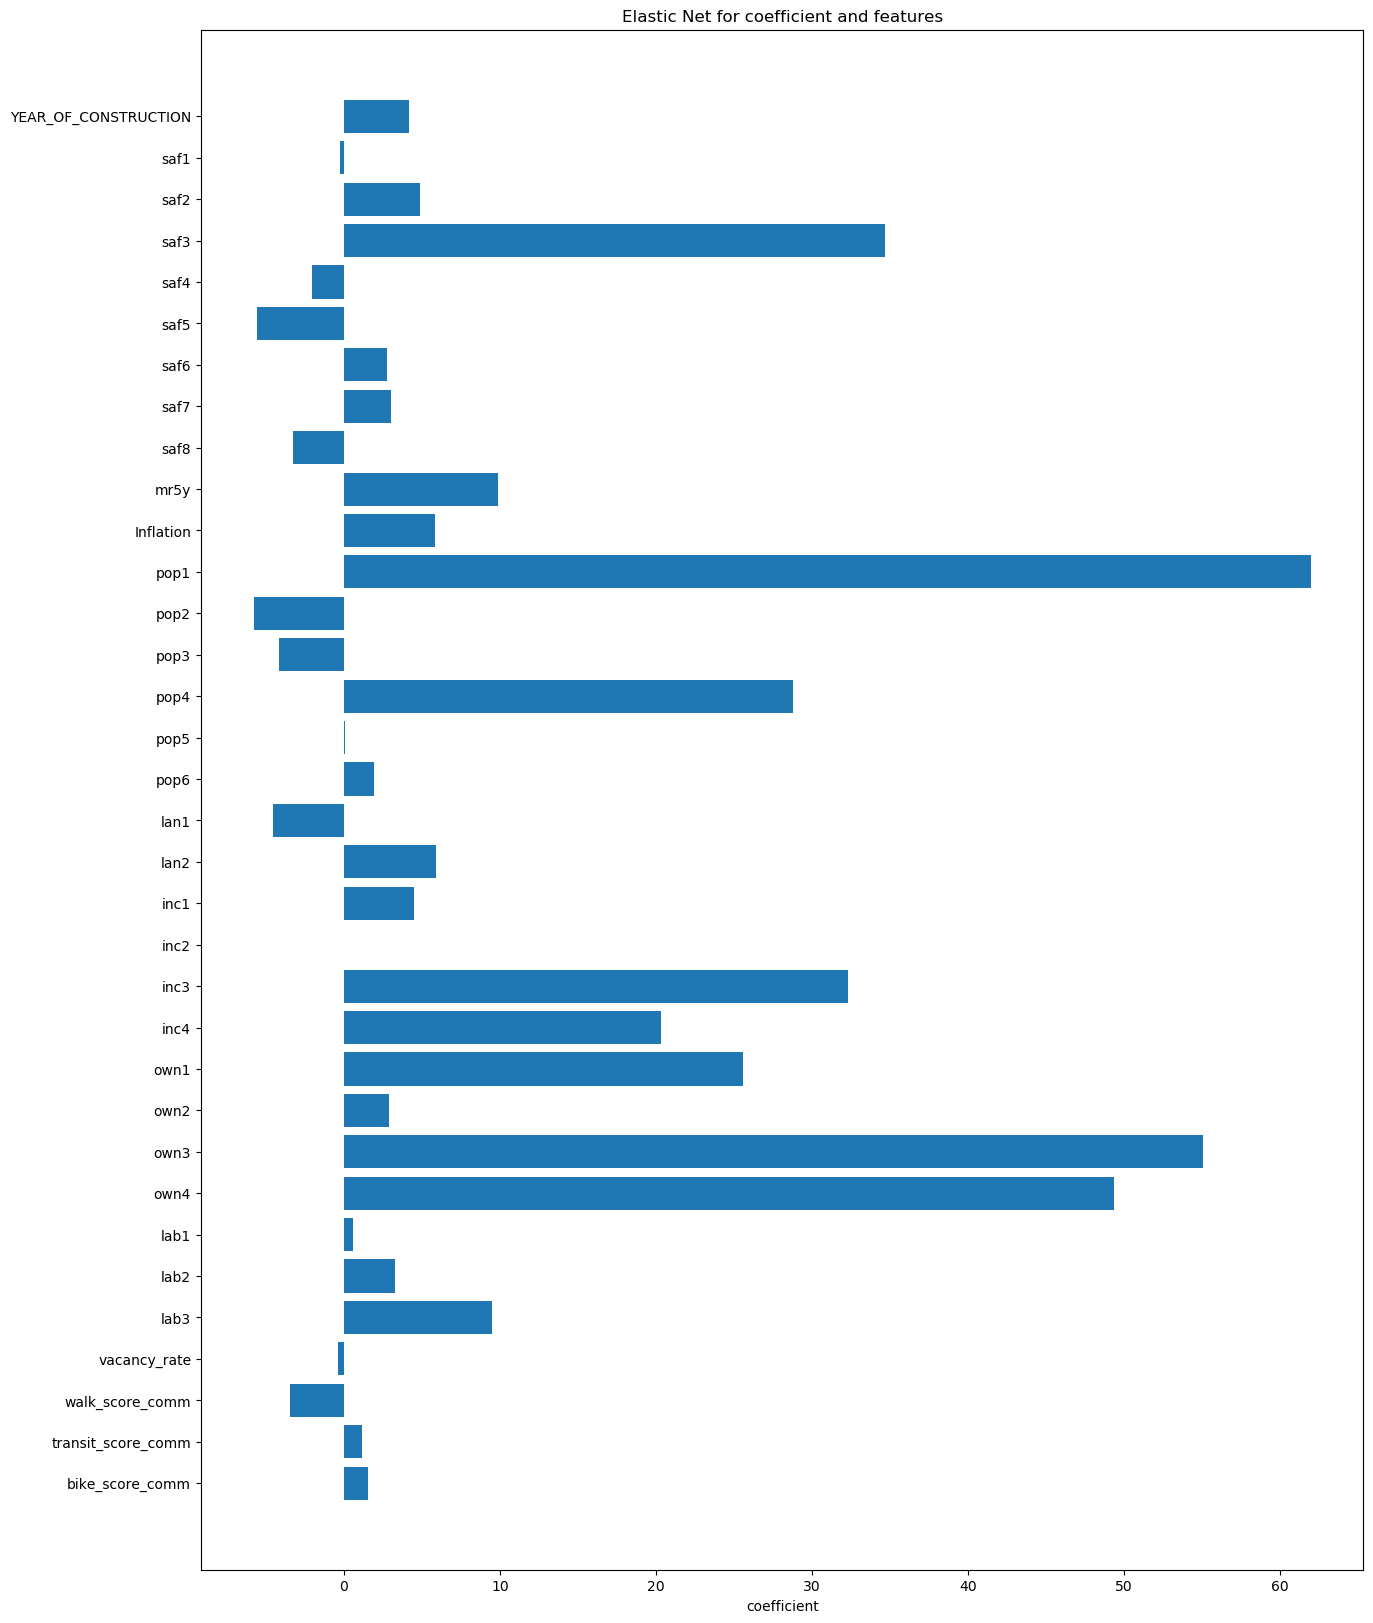

In [70]:
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(15,20))
ax.barh(features, regr.coef_)
ax.set_yticks(features)
ax.set_yticklabels(features)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('coefficient')
ax.set_title('Elastic Net for coefficient and features')

plt.show()

### Conclusion from Elastic Net : Top 10 features(pop1, own3, own4,saf3,pop4,inc3,own1,inc4,mr5y,lab3)